# Week 8 Prac
Regularization
Regularization is an important concept that is used to avoid overfitting of the data, especially when the trained and test data are
varying much.
Regularization is implemented by adding a “penalty” term to the best fit derived from the trained data, to achieve a lesser variance
with the tested data and also restricts the influence of predictor variables over the output variable by compressing their
coefficients.
In regularization, what we do is normally we keep the same number of features but reduce the magnitude of the coefficients. We
can reduce the magnitude of the coefficients by using different types of regression techniques which uses regularization to
overcome this problem. So, let us discuss them.
About The Data
For this lab, we'll be revisiting the lab 4 housing dataset and comparing the below regression techniques:
Linear Regression
Ridge Regression
Lasso Regression
The dataset that we'll be using for this task comes from kaggle.com and contains the following attributes:
'Avg. Area Income': Avg. income of residents of the city house is located in.
'Avg. Area House Age': Avg age of houses in same city
'Avg. Area Number of Rooms': Avg number of rooms for houses in same city
'Avg. Area Number of Bedrooms': Avg number of bedrooms for houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at (target)
'Address': Address for the house

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
from sklearn.datasets import load_iris

In [66]:
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Different example

In [67]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Different examples

In [69]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [70]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Different example

In [71]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


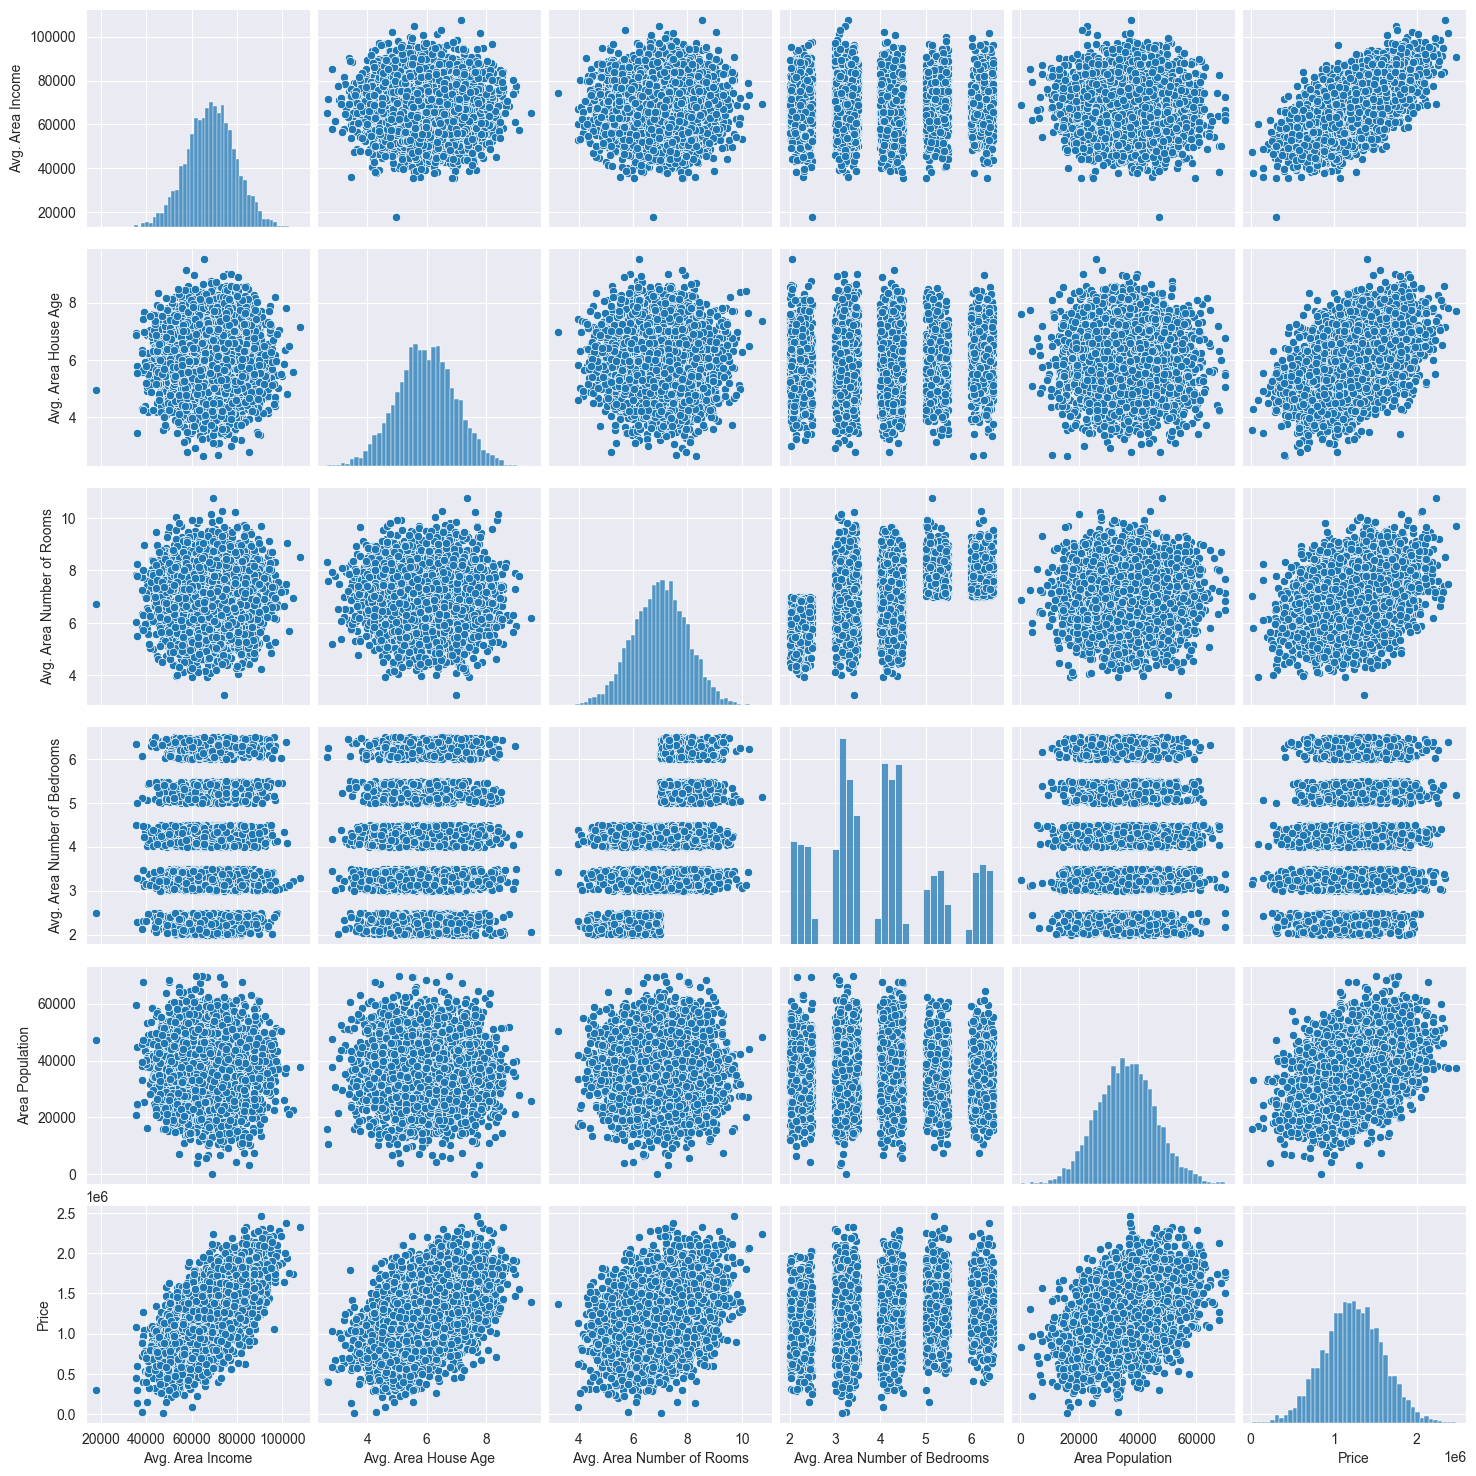

In [72]:
sns.pairplot(housing_data)
plt.show()

### Different examples

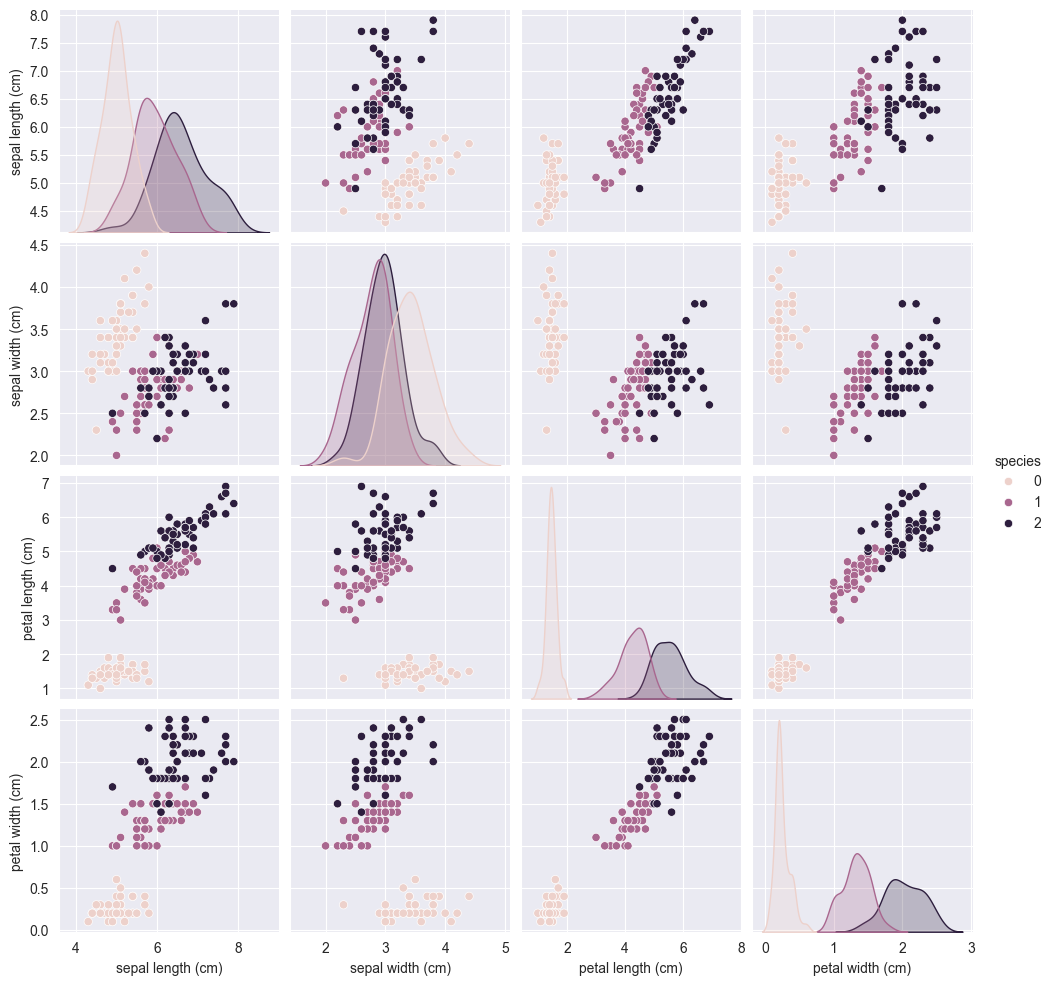

In [73]:
sns.pairplot(iris_df, hue='species')
plt.show()

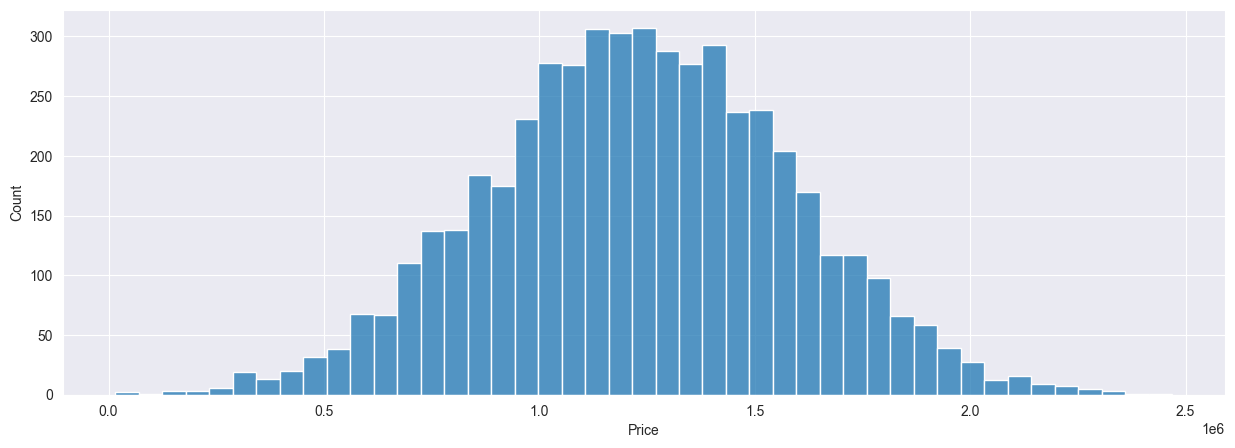

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [74]:
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

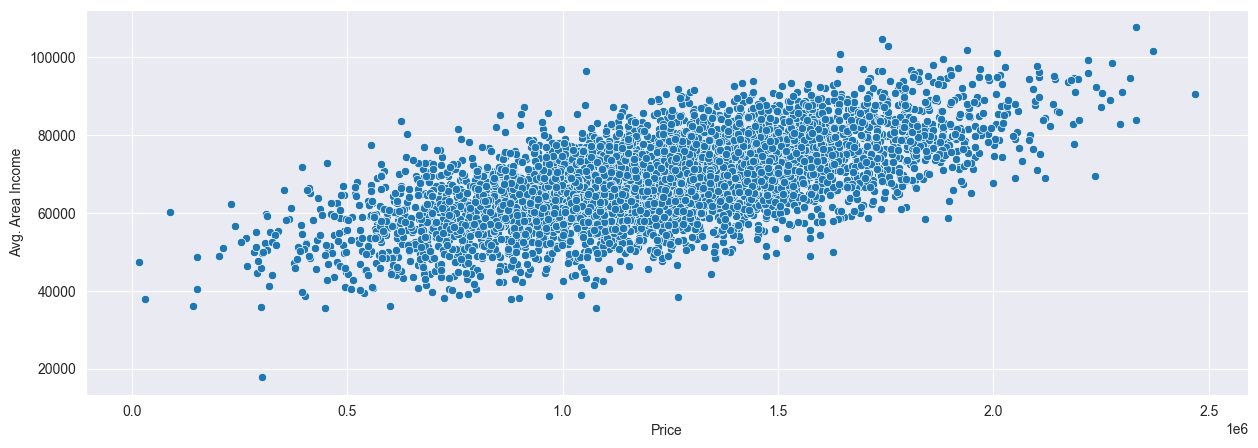

In [75]:
sns.scatterplot(x='Price', y='Avg. Area Income', data=housing_data)
plt.show()

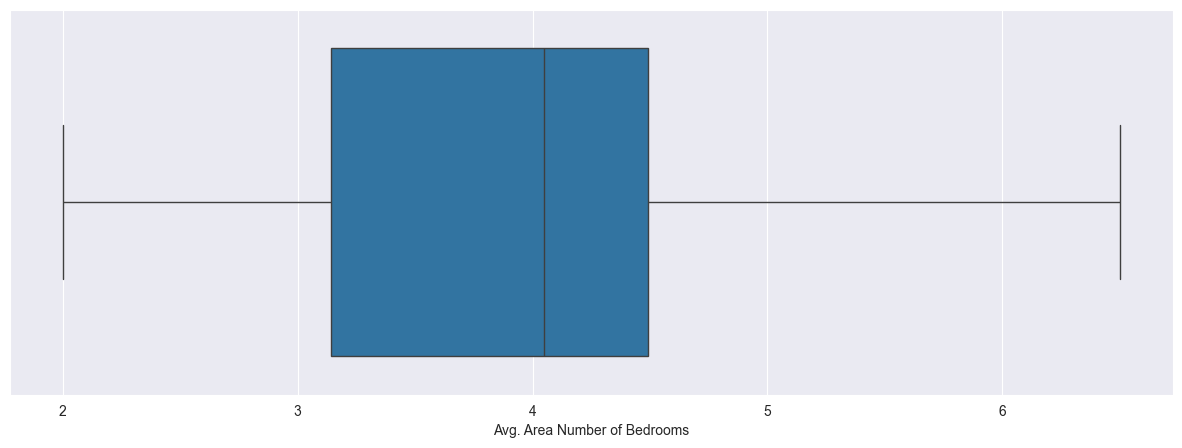

In [76]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

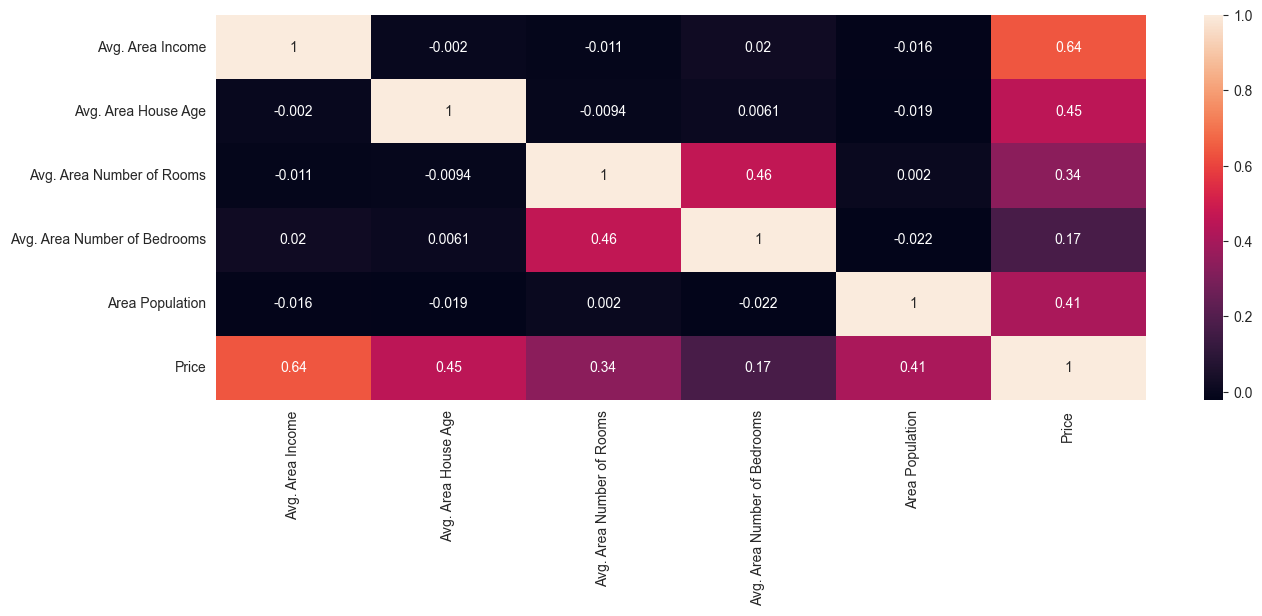

In [77]:
sns.heatmap(housing_data.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

### Different example

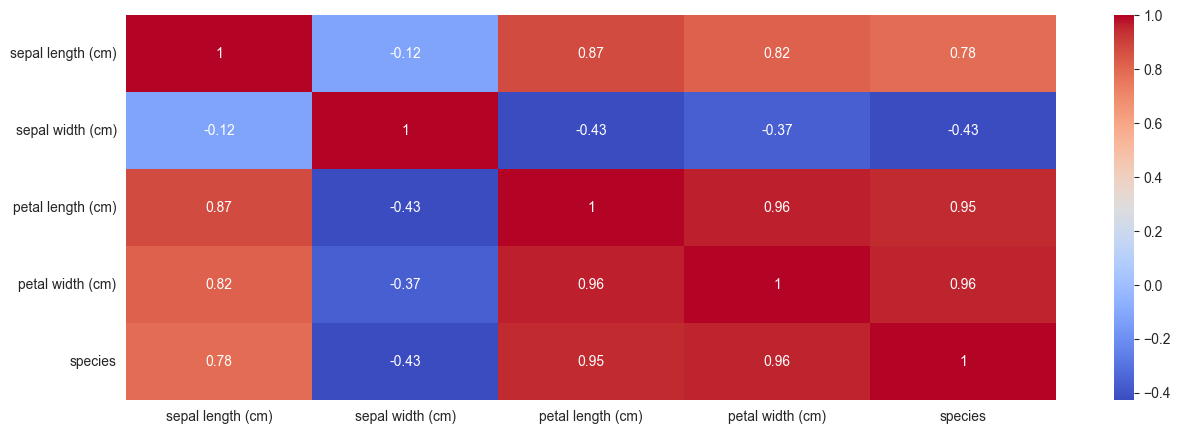

In [78]:
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
# pass our X_test data through the model ﴾lm﴿ to get our predictions
predictions = lm.predict(X_test)

In [81]:
from sklearn import metrics
from sklearn.metrics import r2_score
# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE: 80808.98843128595
MSE: 10026592009.728157
RMSE: 100132.87177409903
R2 Score:  0.919838724727495


In [82]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Standardize the features (normalize)
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

# Step 2: Fit the Ridge model with normalized data
ridge = Ridge(alpha=0.05)
ridge.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test data
predictions_ridge = ridge.predict(X_test_scaled)

# Step 4: Print metrics
print('MAE:', mean_absolute_error(y_test, predictions_ridge))
print('MSE:', mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_ridge)))
print('R2 Score:', r2_score(y_test, predictions_ridge))


MAE: 80809.1653821713
MSE: 10026608081.833967
RMSE: 100132.95202796115
R2 Score: 0.9198385962331375


In [83]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Standardize the features (normalize)
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

# Step 2: Fit the Lasso model with normalized data
lasso = Lasso(alpha=0.05)
lasso.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test data
predictions_lasso = lasso.predict(X_test_scaled)

# Step 4: Print metrics
print('MAE:', mean_absolute_error(y_test, predictions_lasso))
print('MSE:', mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_lasso)))
print('R2 Score:', r2_score(y_test, predictions_lasso))


MAE: 80808.98981574035
MSE: 10026592302.035679
RMSE: 100132.87323369723
R2 Score: 0.919838722390535


### Different examples using the iris dataset

In [84]:
# Splitting Data
X = iris_df.drop(columns=['species'])
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Linear Regression for prediction
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.038665912378257894
R² Score: 0.9442318571467434


In [86]:
# Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=0.05)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print('Ridge Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
print('Ridge R² Score:', r2_score(y_test, y_pred_ridge))

Ridge Mean Squared Error: 0.03864901881438541
Ridge R² Score: 0.9442562228638672


In [87]:
# Lasso Regression
lasso = Lasso(alpha=0.05)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print('Lasso Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('Lasso R² Score:', r2_score(y_test, y_pred_lasso))

Lasso Mean Squared Error: 0.040756356190621075
Lasso R² Score: 0.941216793955835
